In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st 
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [42]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv"
df=pd.read_csv(path)
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [44]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [45]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [46]:
X = df.drop(columns="Sales")
y = df["Sales"]


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25,
                                               random_state= 80)

In [71]:
model = LinearRegression()
model

LinearRegression()

In [72]:
model.fit(X_train,y_train)

LinearRegression()

In [73]:
model.intercept_

4.7917637017643795

In [74]:
model.coef_

array([ 0.05491004,  0.10410395, -0.00148212])

In [75]:
y_pred=model.predict(X_test)

In [76]:
res = pd.DataFrame(data=list(zip(y_pred,y_test)),columns=["predetta","reale"])
res

,predetta,reale
0,21.608032,19.8
1,13.151407,13.3
2,20.299506,20.1
3,18.990869,17.1
4,23.503923,24.2
5,17.098206,20.5
6,7.905941,8.1
7,8.939823,1.6
8,18.323507,17.5
9,21.240658,18.9


In [77]:
res["error"]= res["reale"]-res["predetta"]
res

,predetta,reale,error
0,21.608032,19.8,-1.808032
1,13.151407,13.3,0.148593
2,20.299506,20.1,-0.199506
3,18.990869,17.1,-1.890869
4,23.503923,24.2,0.696077
5,17.098206,20.5,3.401794
6,7.905941,8.1,0.194059
7,8.939823,1.6,-7.339823
8,18.323507,17.5,-0.823507
9,21.240658,18.9,-2.340658


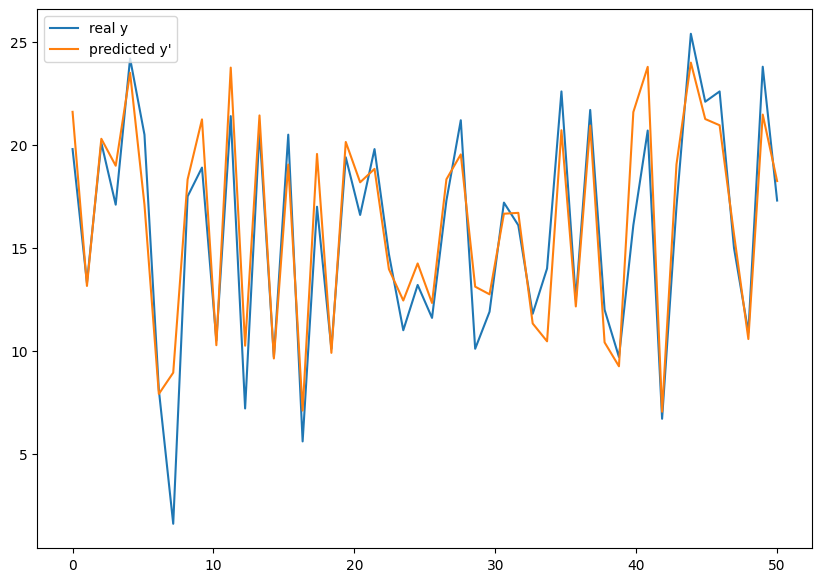

In [78]:
lenght = y_pred.shape[0]
x = np.linspace(0,lenght,lenght)
x
plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [79]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R2_score: ', r2score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2_score:  0.8604963327580047
MAE:  1.4819921057985954
MSE:  4.080279149488857
RMSE:  2.01997008628565


In [80]:
import joblib

## to save a model
joblib.dump(model,'regression_test.pkl')

['regression_test.pkl']